In [213]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sns

# PATH_NAMES
UP_GYM_1 = '../../inputs/upstairs_chris.xls'
UP_GYM_2 = '../../inputs/upstairs_ana.xls'
UP_UNI_1 = '../../inputs/upstairs_with_barometer_1.xls'
UP_UNI_2 = '../../inputs/upstairs_with_barometer_2.xls'
UP_WITH_WALK_UNI_1 = '../../inputs/up_and_down_with_walk_in_between/upstairs_with_barometer_1.xls'
UP_WITH_WALK_UNI_2 = '../../inputs/up_and_down_with_walk_in_between/upstairs_with_barometer_2.xls'

DOWN_GYM_1 = '../../inputs/downstairs_chris.xls'
DOWN_GYM_2 = '../../inputs/downstairs_ana.xls'
DOWN_UNI_1 = '../../inputs/downstairs_with_barometer_1.xls'
DOWN_UNI_2 = '../../inputs/downstairs_with_barometer_2.xls'
DOWN_WITH_WALK_UNI_1 = '../../inputs/up_and_down_with_walk_in_between/downstairs_with_barometer_1.xls'
DOWN_WITH_WALK_UNI_2 = '../../inputs/up_and_down_with_walk_in_between/downstairs_with_barometer_2.xls'

In [214]:
def getListsFromExcel(file_names_list, accel_list=[], gyro_list=[], accel_linear_list=[]):
    for name in file_names_list:
        accel_list.append(pd.read_excel(open(name, 'rb'), sheet_name="Accelerometer"))
        gyro_list.append(pd.read_excel(open(name, 'rb'), sheet_name="Gyroscope"))
        accel_linear_list.append(pd.read_excel(open(name, 'rb'), sheet_name="Linear Acceleration"))
    return [accel_list, gyro_list, accel_linear_list]

In [215]:
FILE_NAMES_UPSTAIRS = [UP_GYM_1]
FILE_NAME_DOWNSTAIRS = [DOWN_GYM_2]

In [216]:
[upstairs_accel_list, upstairs_gyro_list, upstairs_accel_linear_list] = \
    getListsFromExcel(FILE_NAMES_UPSTAIRS)
df_upstairs_accel = pd.concat(upstairs_accel_list)
df_upstairs_gyro = pd.concat(upstairs_gyro_list)
df_upstairs_accel_linear = pd.concat(upstairs_accel_linear_list)


[downstairs_accel_list, downstairs_gyro_list, downstairs_accel_linear_list] = getListsFromExcel(FILE_NAME_DOWNSTAIRS)
df_downstairs_accel = pd.concat(downstairs_accel_list)
df_downstairs_gyro = pd.concat(downstairs_gyro_list)
df_downstairs_accel_linear = pd.concat(downstairs_accel_linear_list)

In [217]:
def removeNulls(df_sets):
    print("No. of nulls: {}".format(df_sets.isna().sum().sum()))
    df_no_nulls = df_sets.dropna()
    print("No. of nulls: {}".format(df_no_nulls.isna().sum().sum()))
    return df_no_nulls

In [218]:
def getDuplicates(df_sets) -> int:
    print("number of duplicates = " + str(df_sets.duplicated().sum()))
    return df_sets.duplicated().sum()

In [219]:
def removeDuplicates(df):
    if getDuplicates(df) > 0:
        df.drop_duplicates(inplace=True)
    print(getDuplicates(df))
    return df

In [220]:
removeDuplicates(df_upstairs_accel_linear)

number of duplicates = 2
number of duplicates = 0
0


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.170960,-0.173424,0.004152,0.047689
1,0.190405,-0.178386,-0.313238,-0.114322
2,0.209849,-0.410237,-0.168061,0.051076
3,0.229294,-0.375503,0.120773,-0.187236
4,0.248558,-0.224053,-0.399061,-0.511366
...,...,...,...,...
4803,96.372847,0.292368,-0.323481,0.673162
4804,96.392847,0.292368,-0.323481,0.673162
4805,96.412847,0.292368,-0.323481,0.673162
4806,96.432847,0.063118,2.547145,0.178977


number of duplicates = 2
number of duplicates = 0
0


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.170960,-0.173424,0.004152,0.047689
1,0.190405,-0.178386,-0.313238,-0.114322
2,0.209849,-0.410237,-0.168061,0.051076
3,0.229294,-0.375503,0.120773,-0.187236
4,0.248558,-0.224053,-0.399061,-0.511366
...,...,...,...,...
4803,96.372847,0.292368,-0.323481,0.673162
4804,96.392847,0.292368,-0.323481,0.673162
4805,96.412847,0.292368,-0.323481,0.673162
4806,96.432847,0.063118,2.547145,0.178977


In [221]:
removeDuplicates(df_downstairs_accel_linear)

number of duplicates = 2
number of duplicates = 0
0


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.170960,-0.173424,0.004152,0.047689
1,0.190405,-0.178386,-0.313238,-0.114322
2,0.209849,-0.410237,-0.168061,0.051076
3,0.229294,-0.375503,0.120773,-0.187236
4,0.248558,-0.224053,-0.399061,-0.511366
...,...,...,...,...
4129,84.322562,0.620613,0.407175,0.818223
4130,84.342562,0.415529,1.610068,0.272168
4131,84.362562,-0.035684,3.735106,-1.149976
4132,84.382562,-0.375342,3.508055,-1.177298


number of duplicates = 2
number of duplicates = 0
0


,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.170960,-0.173424,0.004152,0.047689
1,0.190405,-0.178386,-0.313238,-0.114322
2,0.209849,-0.410237,-0.168061,0.051076
3,0.229294,-0.375503,0.120773,-0.187236
4,0.248558,-0.224053,-0.399061,-0.511366
...,...,...,...,...
4129,84.322562,0.620613,0.407175,0.818223
4130,84.342562,0.415529,1.610068,0.272168
4131,84.362562,-0.035684,3.735106,-1.149976
4132,84.382562,-0.375342,3.508055,-1.177298


In [222]:
df_upstairs_accel.drop(columns=['Time (s)'], inplace=True)
df_upstairs_gyro.drop(columns=['Time (s)'], inplace=True)
df_upstairs_accel_linear.drop(columns=['Time (s)'], inplace=True)

df_downstairs_accel.drop(columns=['Time (s)'], inplace=True)
df_downstairs_gyro.drop(columns=['Time (s)'], inplace=True)
df_downstairs_accel_linear.drop(columns=['Time (s)'], inplace=True)

In [223]:
def gitMinDataFrameLength(data):
    return min(map(len, data))

In [224]:
ups = [df_upstairs_accel, df_upstairs_gyro, df_upstairs_accel_linear]

min_len = gitMinDataFrameLength(ups)
df_upstairs_accel = df_upstairs_accel[:min_len]
df_upstairs_gyro = df_upstairs_gyro[:min_len]
df_upstairs_accel_linear = df_upstairs_accel_linear[:min_len]

df_upstairs_accel.index = df_upstairs_accel_linear.index
df_upstairs_gyro.index = df_upstairs_accel_linear.index
df_upstairs_accel_linear.index = df_upstairs_gyro.index

full_data_up = pd.concat([df_upstairs_accel, df_upstairs_gyro, df_upstairs_accel_linear], axis=1)
full_data_up

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,2.009373,6.286543,7.390233,0.074829,0.460579,-0.049326,-0.173424,0.004152,0.047689
1,2.742175,5.432306,6.477969,0.097125,0.106440,-0.033138,-0.178386,-0.313238,-0.114322
2,2.742175,5.432306,6.477969,0.220974,0.035124,0.077730,-0.410237,-0.168061,0.051076
3,1.908874,6.281758,7.389036,0.180200,0.263733,-0.072996,-0.375503,0.120773,-0.187236
4,2.224129,5.791229,6.769295,0.122322,0.126140,-0.057572,-0.224053,-0.399061,-0.511366
...,...,...,...,...,...,...,...,...,...
4803,-1.779662,9.056833,-0.658026,0.179742,0.663533,0.154392,0.292368,-0.323481,0.673162
4804,-2.174478,9.706485,-0.432503,0.184170,0.645055,0.150116,0.292368,-0.323481,0.673162
4805,-2.324627,10.214960,-0.181256,0.186767,0.599394,0.111480,0.292368,-0.323481,0.673162
4806,-2.470589,10.779068,-0.120838,0.176382,0.549763,0.080632,0.063118,2.547145,0.178977


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,2.009373,6.286543,7.390233,0.074829,0.460579,-0.049326,-0.173424,0.004152,0.047689
1,2.742175,5.432306,6.477969,0.097125,0.106440,-0.033138,-0.178386,-0.313238,-0.114322
2,2.742175,5.432306,6.477969,0.220974,0.035124,0.077730,-0.410237,-0.168061,0.051076
3,1.908874,6.281758,7.389036,0.180200,0.263733,-0.072996,-0.375503,0.120773,-0.187236
4,2.224129,5.791229,6.769295,0.122322,0.126140,-0.057572,-0.224053,-0.399061,-0.511366
...,...,...,...,...,...,...,...,...,...
4803,-1.779662,9.056833,-0.658026,0.179742,0.663533,0.154392,0.292368,-0.323481,0.673162
4804,-2.174478,9.706485,-0.432503,0.184170,0.645055,0.150116,0.292368,-0.323481,0.673162
4805,-2.324627,10.214960,-0.181256,0.186767,0.599394,0.111480,0.292368,-0.323481,0.673162
4806,-2.470589,10.779068,-0.120838,0.176382,0.549763,0.080632,0.063118,2.547145,0.178977


In [225]:
full_data_up_with_label = full_data_up.copy()
full_data_up_with_label.insert(9, 'Activity', 'WALKING_UPSTAIRS')

In [226]:
downs = [df_downstairs_accel, df_downstairs_gyro, df_downstairs_accel_linear]

min_len_down = gitMinDataFrameLength(downs)

df_downstairs_accel = df_downstairs_accel[:min_len_down]
df_downstairs_gyro = df_downstairs_gyro[:min_len_down]
df_downstairs_accel_linear = df_downstairs_accel_linear[:min_len_down]

df_downstairs_accel.index = df_downstairs_accel_linear.index
df_downstairs_gyro.index = df_downstairs_accel_linear.index
df_downstairs_accel_linear.index = df_downstairs_accel_linear.index

full_data_down = pd.concat([df_downstairs_accel, df_downstairs_gyro, df_downstairs_accel_linear], axis=1)

In [227]:
full_data_down_with_label = full_data_down.copy()
full_data_down_with_label.insert(9, 'Activity', 'WALKING_DOWNSTAIRS')

In [228]:
full_data_up_with_label.describe()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
count,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000
mean,-0.078265,9.610769,-1.383473,0.026864,0.010453,0.016295,0.090082,-0.005564,0.002550
std,1.176165,2.321130,1.499236,0.296053,0.613163,0.332657,0.817697,2.279791,1.278181
min,-5.814559,3.396013,-6.832705,-3.361034,-2.119793,-1.526813,-3.723742,-5.885284,-4.363200
25%,-0.931257,7.716255,-1.971088,-0.152063,-0.318366,-0.217462,-0.407973,-1.891662,-0.721000
50%,-0.075374,9.643674,-1.125225,0.049479,0.007330,-0.016722,0.095613,-0.037415,0.177536
75%,0.768545,11.213066,-0.573679,0.208757,0.302713,0.209673,0.571746,1.595681,0.777649
max,3.446861,20.312672,11.120045,2.495464,10.774734,3.789086,3.616059,11.106881,4.082839


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
count,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000,4806.000000
mean,-0.078265,9.610769,-1.383473,0.026864,0.010453,0.016295,0.090082,-0.005564,0.002550
std,1.176165,2.321130,1.499236,0.296053,0.613163,0.332657,0.817697,2.279791,1.278181
min,-5.814559,3.396013,-6.832705,-3.361034,-2.119793,-1.526813,-3.723742,-5.885284,-4.363200
25%,-0.931257,7.716255,-1.971088,-0.152063,-0.318366,-0.217462,-0.407973,-1.891662,-0.721000
50%,-0.075374,9.643674,-1.125225,0.049479,0.007330,-0.016722,0.095613,-0.037415,0.177536
75%,0.768545,11.213066,-0.573679,0.208757,0.302713,0.209673,0.571746,1.595681,0.777649
max,3.446861,20.312672,11.120045,2.495464,10.774734,3.789086,3.616059,11.106881,4.082839


In [229]:
full_data_down_with_label.describe()

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
count,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000
mean,0.429903,9.521826,0.296740,0.013014,0.001210,0.004555,-0.041563,0.070451,-0.129675
std,1.210302,2.294730,2.299941,0.270605,0.543414,0.293831,0.896561,2.293059,1.145675
min,-5.814559,-0.077767,-6.832705,-3.361034,-8.496525,-5.729458,-4.674445,-9.492670,-5.227655
25%,-0.394816,7.668249,-1.258326,-0.150311,-0.251715,-0.136677,-0.569647,-1.743225,-0.797886
50%,0.547059,9.465408,-0.217149,0.037110,0.001374,-0.003512,0.004376,-0.054925,-0.026980
75%,1.235893,11.140085,2.310569,0.181922,0.255411,0.124692,0.499407,1.687640,0.582465
max,11.563913,20.312672,11.120045,2.495464,10.774734,3.789086,3.616059,11.106881,4.082839


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
count,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000,8940.000000
mean,0.429903,9.521826,0.296740,0.013014,0.001210,0.004555,-0.041563,0.070451,-0.129675
std,1.210302,2.294730,2.299941,0.270605,0.543414,0.293831,0.896561,2.293059,1.145675
min,-5.814559,-0.077767,-6.832705,-3.361034,-8.496525,-5.729458,-4.674445,-9.492670,-5.227655
25%,-0.394816,7.668249,-1.258326,-0.150311,-0.251715,-0.136677,-0.569647,-1.743225,-0.797886
50%,0.547059,9.465408,-0.217149,0.037110,0.001374,-0.003512,0.004376,-0.054925,-0.026980
75%,1.235893,11.140085,2.310569,0.181922,0.255411,0.124692,0.499407,1.687640,0.582465
max,11.563913,20.312672,11.120045,2.495464,10.774734,3.789086,3.616059,11.106881,4.082839


In [230]:
# for some reason we have more data points for downstairs walk
full_data_down_with_label = full_data_down_with_label.sample(frac=1).reset_index(drop=True)
full_data_down_with_label = full_data_down_with_label[:len(full_data_up_with_label)]

In [231]:
kernal_evals = dict()

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')

    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix, display_labels = ['UPSTAIRS', 'DOWNSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [232]:
full_data = pd.concat([full_data_down_with_label, full_data_up_with_label], axis=0).reset_index(drop=True)
# shuffle data
full_data = full_data.sample(frac=1).reset_index(drop=True)
full_data

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Activity
0,-0.562912,12.342777,-0.697508,0.352764,0.380863,-0.200511,-0.424177,0.527673,1.010456,WALKING_UPSTAIRS
1,2.036292,9.626924,-1.738984,-0.113312,-0.111021,-0.228915,0.294280,0.868034,1.443100,WALKING_UPSTAIRS
2,-0.475574,9.756136,-0.850648,0.145687,-0.130263,-0.000153,-0.596408,-1.499520,1.207046,WALKING_UPSTAIRS
3,1.481157,7.880163,-1.944767,-0.517388,-0.151796,-0.367425,0.186636,-3.328038,0.757013,WALKING_UPSTAIRS
4,-2.431706,9.141181,0.620339,0.015118,-0.194402,0.311532,0.560918,-0.222514,-0.296539,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...
9607,-0.625723,13.581661,-0.455234,0.261901,-0.578472,-0.090711,0.728269,1.619377,0.715647,WALKING_DOWNSTAIRS
9608,0.597009,9.962517,-1.684547,-0.215935,-0.501200,-0.284655,0.261322,-3.104520,0.665239,WALKING_UPSTAIRS
9609,0.462413,7.214959,-0.891326,-0.010384,0.006261,-0.183865,-0.230391,-1.134878,0.994319,WALKING_UPSTAIRS
9610,-1.277169,7.249654,-0.370888,0.151948,0.661395,0.120642,0.292368,-0.323481,0.673162,WALKING_UPSTAIRS


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Activity
0,0.886541,10.502697,4.083950,0.099724,-0.274126,0.013439,-0.284839,-3.473306,-0.968843,WALKING_DOWNSTAIRS
1,1.163510,9.634701,-1.135993,0.249684,0.214713,0.177604,-1.814303,-0.037329,0.380722,WALKING_DOWNSTAIRS
2,-1.004387,9.446864,0.830908,0.178978,-0.052533,0.230900,1.705677,-0.324424,-1.506842,WALKING_UPSTAIRS
3,0.750748,8.916854,-1.090529,0.270911,-0.567935,-0.177146,-0.977188,0.665761,-1.653841,WALKING_DOWNSTAIRS
4,-1.823331,12.891931,-0.205783,-0.101859,0.096514,0.535102,1.566265,-0.755870,-1.080750,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...
9607,-0.729213,11.849257,-0.800997,0.182949,0.433549,0.112090,0.504348,-4.252875,1.304555,WALKING_UPSTAIRS
9608,0.503091,6.620940,0.231506,0.227846,0.738362,0.241590,0.993506,0.188067,0.591664,WALKING_UPSTAIRS
9609,-2.227718,10.231112,-0.330808,0.153934,0.606113,0.161875,-1.884816,2.132737,-1.833306,WALKING_DOWNSTAIRS
9610,-1.512264,11.752947,-0.438485,0.145229,0.401479,-0.100332,0.188944,0.094177,0.812900,WALKING_DOWNSTAIRS


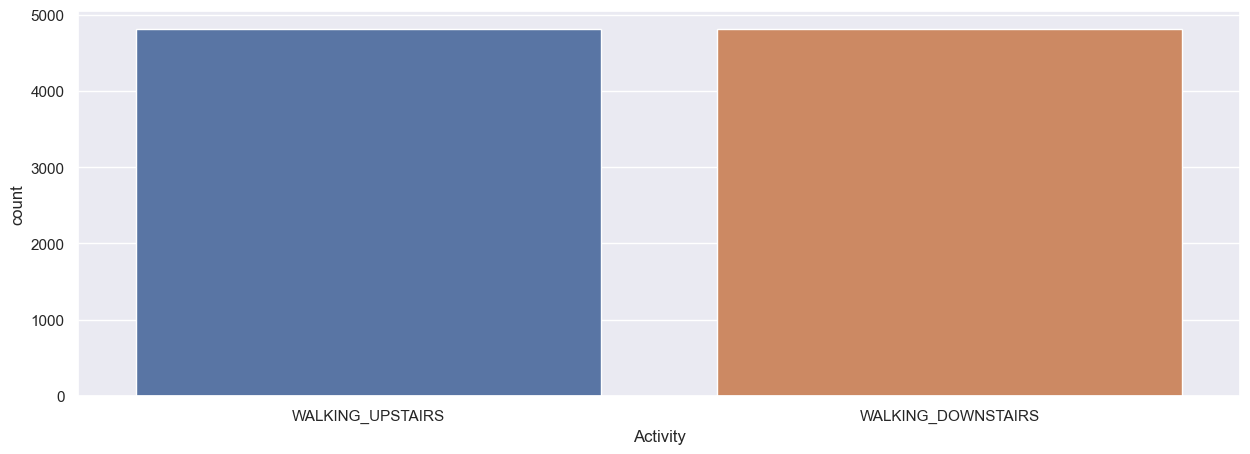

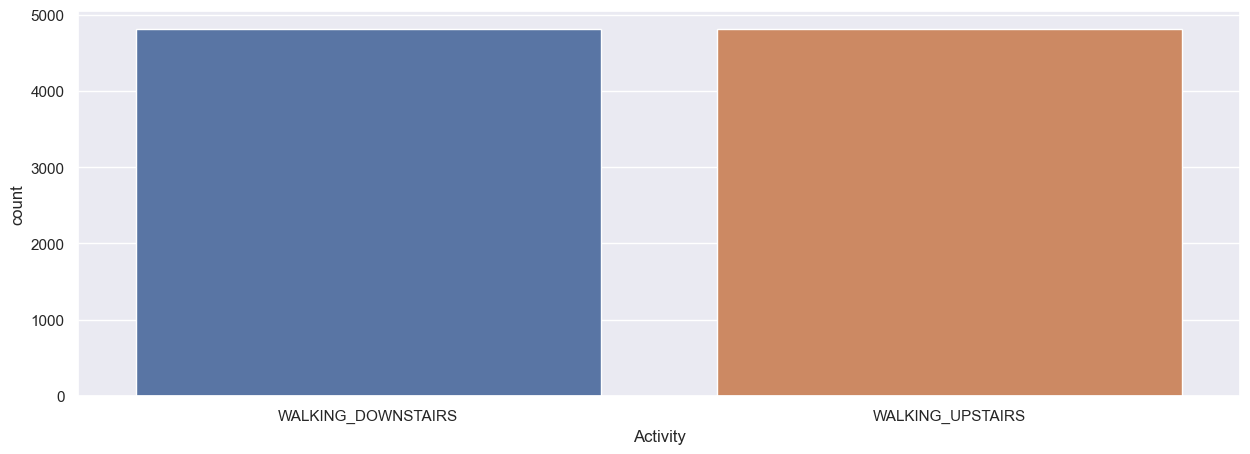

In [233]:
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Activity', data=full_data, order=full_data['Activity'].value_counts().index)

Training Accuracy LogisticRegression 66.97384066587396  Test Accuracy LogisticRegression 67.99583911234397
Training Precesion LogisticRegression 66.97384066587396  Test Precesion LogisticRegression 67.99583911234397
Training Recall LogisticRegression 66.97384066587396  Test Recall LogisticRegression 67.99583911234397


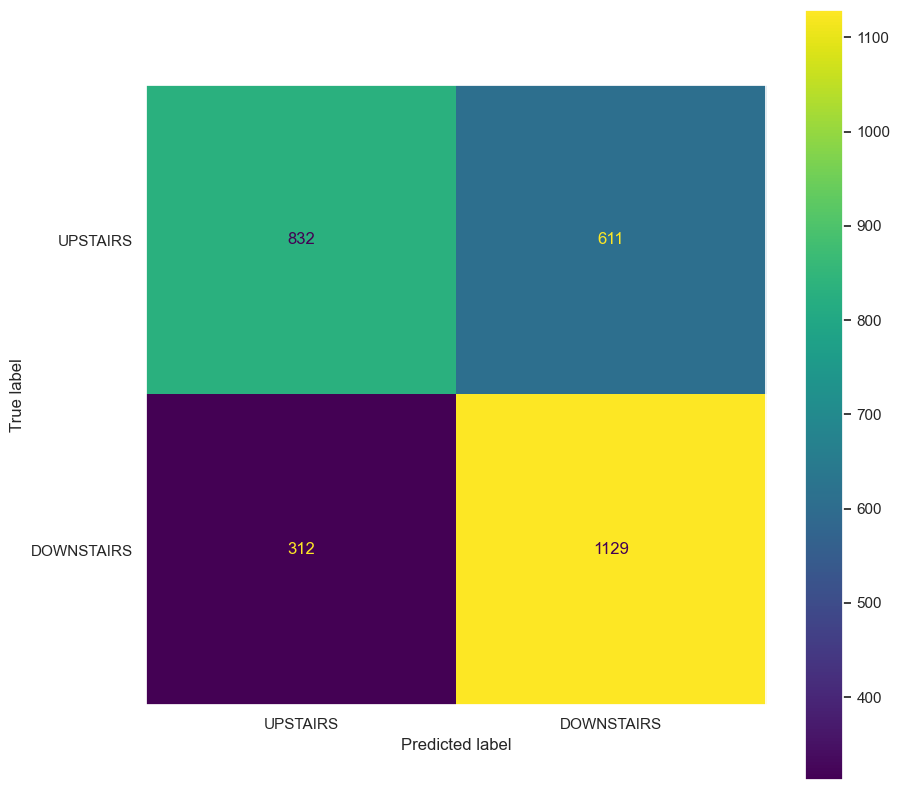

Training Accuracy LogisticRegression 66.94411414982164  Test Accuracy LogisticRegression 66.81692094313453
Training Precesion LogisticRegression 66.94411414982164  Test Precesion LogisticRegression 66.81692094313453
Training Recall LogisticRegression 66.94411414982164  Test Recall LogisticRegression 66.81692094313453


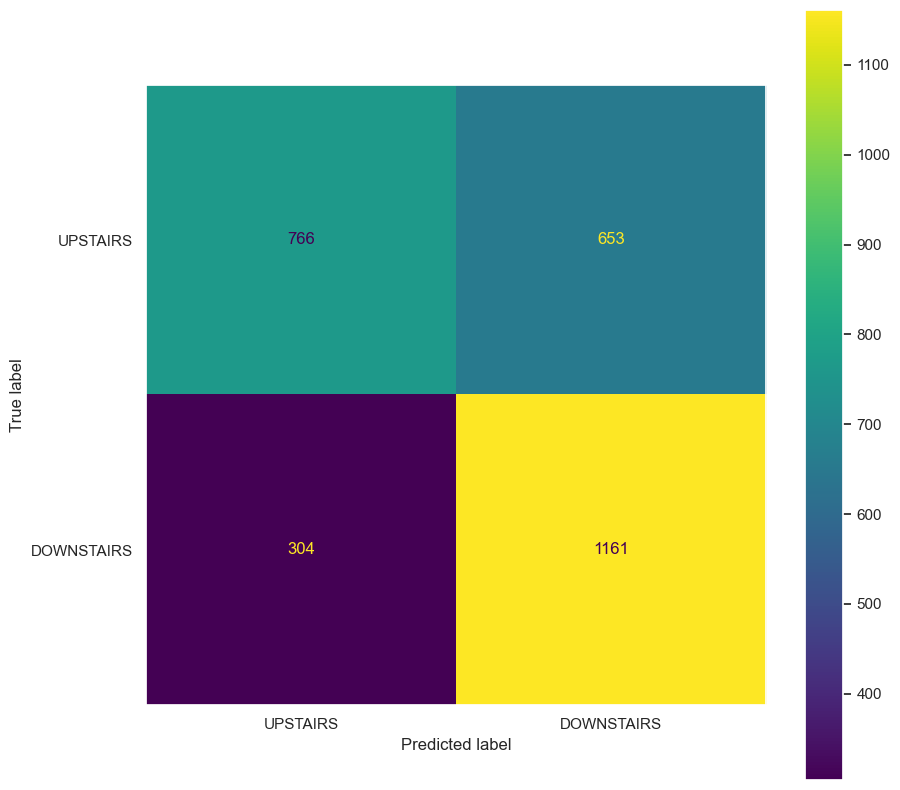

In [234]:
X = full_data.drop(['Activity'], axis=1)
y = full_data['Activity']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

lrm = LogisticRegression().fit(x_train, y_train)
ld = LinearDiscriminantAnalysis().fit(x_train, y_train)

evaluate_classification(lrm, "LogisticRegression", x_train, x_test, y_train, y_test)

In [235]:
# Prepare Test Data UP
UP_TEST_HOME = '../../inputs/upstairs_test_home.xls'
[up_test_home_accel_list, up_test_home_gyro_list, up_test_home_accel_linear_list] = getListsFromExcel([UP_TEST_HOME])
df_up_test_home_accel = pd.concat(up_test_home_accel_list)
df_up_test_home_gyro = pd.concat(up_test_home_gyro_list)
df_up_test_home_accel_linear = pd.concat(up_test_home_accel_linear_list)
df_up_test_home_accel.drop(columns=['Time (s)'], inplace=True)
df_up_test_home_gyro.drop(columns=['Time (s)'], inplace=True)
df_up_test_home_accel_linear.drop(columns=['Time (s)'], inplace=True)
min_len_test_up = gitMinDataFrameLength([df_up_test_home_accel, df_up_test_home_gyro, df_up_test_home_accel_linear])
min_len_test_up

11007

11007

In [236]:
# Prepare Test Data DOWN
DOWN_TEST_HOME = '../../inputs/downstairs_test_home.xls'
[down_test_home_accel_list, down_test_home_gyro_list, down_test_home_accel_linear_list] = getListsFromExcel([DOWN_TEST_HOME])

df_down_test_home_accel = pd.concat(down_test_home_accel_list)
df_down_test_home_gyro = pd.concat(down_test_home_gyro_list)
df_down_test_home_accel_linear = pd.concat(down_test_home_accel_linear_list)

df_down_test_home_accel.drop(columns=['Time (s)'], inplace=True)
df_down_test_home_gyro.drop(columns=['Time (s)'], inplace=True)
df_down_test_home_accel_linear.drop(columns=['Time (s)'], inplace=True)

min_len_test_down = gitMinDataFrameLength([df_down_test_home_accel, df_down_test_home_gyro, df_down_test_home_accel_linear])
min_len_test_down

13061

13061

In [237]:
df_up_test_home_accel = df_up_test_home_accel[:min_len_test_up]
df_up_test_home_gyro = df_up_test_home_gyro[:min_len_test_up]
df_up_test_home_accel_linear = df_up_test_home_accel_linear[:min_len_test_up]

df_up_test_home_accel.index = df_up_test_home_accel_linear.index
df_up_test_home_gyro.index = df_up_test_home_accel_linear.index
df_up_test_home_accel_linear.index = df_up_test_home_gyro.index

full_data_test_up = pd.concat([df_up_test_home_accel, df_up_test_home_gyro, df_up_test_home_accel_linear], axis=1)
full_data_test_up.insert(9, 'Activity', 'WALKING_UPSTAIRS')
print(len(df_up_test_home_accel), len(df_up_test_home_gyro), len(df_up_test_home_accel_linear))
full_data_test_up


11007 11007 11007


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Activity
0,2.009373,6.286543,7.390233,0.074829,0.460579,-0.049326,-0.173424,0.004152,0.047689,WALKING_UPSTAIRS
1,2.742175,5.432306,6.477969,0.097125,0.106440,-0.033138,-0.178386,-0.313238,-0.114322,WALKING_UPSTAIRS
2,2.742175,5.432306,6.477969,0.220974,0.035124,0.077730,-0.410237,-0.168061,0.051076,WALKING_UPSTAIRS
3,1.908874,6.281758,7.389036,0.180200,0.263733,-0.072996,-0.375503,0.120773,-0.187236,WALKING_UPSTAIRS
4,2.224129,5.791229,6.769295,0.122322,0.126140,-0.057572,-0.224053,-0.399061,-0.511366,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...
2060,2.763710,8.766106,0.966102,0.134085,-0.141263,0.034667,0.039982,0.223857,1.133179,WALKING_UPSTAIRS
2061,2.845066,8.766106,0.774676,0.063225,-0.169362,-0.002138,0.120522,0.351623,1.155858,WALKING_UPSTAIRS
2062,2.844468,8.885747,0.659821,-0.026420,-0.153633,-0.045968,0.295550,0.609446,1.200663,WALKING_UPSTAIRS
2063,2.849254,8.991031,0.673580,-0.069333,-0.184634,-0.037721,0.481309,0.838033,1.073083,WALKING_UPSTAIRS


11007 11007 11007


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Activity
0,2.009373,6.286543,7.390233,0.074829,0.460579,-0.049326,-0.173424,0.004152,0.047689,WALKING_UPSTAIRS
1,2.742175,5.432306,6.477969,0.097125,0.106440,-0.033138,-0.178386,-0.313238,-0.114322,WALKING_UPSTAIRS
2,2.742175,5.432306,6.477969,0.220974,0.035124,0.077730,-0.410237,-0.168061,0.051076,WALKING_UPSTAIRS
3,1.908874,6.281758,7.389036,0.180200,0.263733,-0.072996,-0.375503,0.120773,-0.187236,WALKING_UPSTAIRS
4,2.224129,5.791229,6.769295,0.122322,0.126140,-0.057572,-0.224053,-0.399061,-0.511366,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...
2060,2.763710,8.766106,0.966102,0.134085,-0.141263,0.034667,0.039982,0.223857,1.133179,WALKING_UPSTAIRS
2061,2.845066,8.766106,0.774676,0.063225,-0.169362,-0.002138,0.120522,0.351623,1.155858,WALKING_UPSTAIRS
2062,2.844468,8.885747,0.659821,-0.026420,-0.153633,-0.045968,0.295550,0.609446,1.200663,WALKING_UPSTAIRS
2063,2.849254,8.991031,0.673580,-0.069333,-0.184634,-0.037721,0.481309,0.838033,1.073083,WALKING_UPSTAIRS


In [238]:
df_down_test_home_accel = df_down_test_home_accel[:min_len_test_down]
df_down_test_home_gyro = df_down_test_home_gyro[:min_len_test_down]
df_down_test_home_accel_linear = df_down_test_home_accel_linear[:min_len_test_down]

df_down_test_home_accel.index = df_down_test_home_accel_linear.index
df_down_test_home_gyro.index = df_down_test_home_accel_linear.index
df_down_test_home_accel_linear.index = df_down_test_home_accel_linear.index

full_data_test_down = pd.concat([df_down_test_home_accel, df_down_test_home_gyro, df_down_test_home_accel_linear], axis=1)
full_data_test_down.insert(9, 'Activity', 'WALKING_DOWNSTAIRS')
full_data_test_down


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Activity
0,2.009373,6.286543,7.390233,0.074829,0.460579,-0.049326,-0.173424,0.004152,0.047689,WALKING_DOWNSTAIRS
1,2.742175,5.432306,6.477969,0.097125,0.106440,-0.033138,-0.178386,-0.313238,-0.114322,WALKING_DOWNSTAIRS
2,2.742175,5.432306,6.477969,0.220974,0.035124,0.077730,-0.410237,-0.168061,0.051076,WALKING_DOWNSTAIRS
3,1.908874,6.281758,7.389036,0.180200,0.263733,-0.072996,-0.375503,0.120773,-0.187236,WALKING_DOWNSTAIRS
4,2.224129,5.791229,6.769295,0.122322,0.126140,-0.057572,-0.224053,-0.399061,-0.511366,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...
2049,0.988834,8.973084,1.874178,0.030238,-0.107207,0.066432,1.205411,1.113249,-0.559603,WALKING_DOWNSTAIRS
2050,0.960120,8.264212,1.805983,0.147066,-0.176540,0.065057,1.388882,1.180486,-1.010998,WALKING_DOWNSTAIRS
2051,0.624527,7.603792,1.648057,0.221897,-0.201738,0.040623,1.313261,1.323259,-0.943727,WALKING_DOWNSTAIRS
2052,0.332004,7.220342,1.392623,0.207389,-0.200211,0.013744,1.128719,1.202090,-0.490553,WALKING_DOWNSTAIRS


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Activity
0,2.009373,6.286543,7.390233,0.074829,0.460579,-0.049326,-0.173424,0.004152,0.047689,WALKING_DOWNSTAIRS
1,2.742175,5.432306,6.477969,0.097125,0.106440,-0.033138,-0.178386,-0.313238,-0.114322,WALKING_DOWNSTAIRS
2,2.742175,5.432306,6.477969,0.220974,0.035124,0.077730,-0.410237,-0.168061,0.051076,WALKING_DOWNSTAIRS
3,1.908874,6.281758,7.389036,0.180200,0.263733,-0.072996,-0.375503,0.120773,-0.187236,WALKING_DOWNSTAIRS
4,2.224129,5.791229,6.769295,0.122322,0.126140,-0.057572,-0.224053,-0.399061,-0.511366,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...
2049,0.988834,8.973084,1.874178,0.030238,-0.107207,0.066432,1.205411,1.113249,-0.559603,WALKING_DOWNSTAIRS
2050,0.960120,8.264212,1.805983,0.147066,-0.176540,0.065057,1.388882,1.180486,-1.010998,WALKING_DOWNSTAIRS
2051,0.624527,7.603792,1.648057,0.221897,-0.201738,0.040623,1.313261,1.323259,-0.943727,WALKING_DOWNSTAIRS
2052,0.332004,7.220342,1.392623,0.207389,-0.200211,0.013744,1.128719,1.202090,-0.490553,WALKING_DOWNSTAIRS


In [239]:
full_data_test = pd.concat([full_data_test_up, full_data_test_down], axis=0).reset_index(drop=True)

full_data_test = full_data_test.sample(frac=1).reset_index(drop=True)
print("UP length: ",  len(full_data_test_up), "DOWN length: ", len(full_data_test_down))
full_data_test

UP length:  11007 DOWN length:  13061


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Activity
0,0.933799,8.303693,2.041078,0.004887,-0.204945,-0.080176,0.079139,-3.230819,-0.488675,WALKING_DOWNSTAIRS
1,1.238884,8.273184,-1.150349,0.015882,-0.571906,-0.298246,1.474991,-0.611609,-2.181901,WALKING_DOWNSTAIRS
2,0.897308,13.847264,1.594218,-0.098197,0.177304,-0.005498,0.631954,0.830176,-1.833526,WALKING_DOWNSTAIRS
3,-0.588036,7.876574,-0.052044,1.548040,0.245561,0.412627,0.926223,0.332135,-0.855883,WALKING_DOWNSTAIRS
4,-0.535394,7.074978,-0.652642,0.040010,0.554497,0.137746,0.217344,-1.603438,-0.127237,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...
24063,1.348356,10.083953,1.671387,-0.047189,-0.002138,0.064446,0.965689,4.402040,-0.433347,WALKING_DOWNSTAIRS
24064,-0.838086,9.785448,-1.500300,0.040774,0.182796,0.104302,-0.920960,4.347152,-4.280579,WALKING_DOWNSTAIRS
24065,1.533201,12.956536,2.303690,0.089950,-0.271377,-0.114690,-0.564267,0.196894,0.567954,WALKING_DOWNSTAIRS
24066,-0.157926,7.026524,-0.143569,-0.327261,-0.328178,-0.356582,0.530840,-2.384445,0.541503,WALKING_UPSTAIRS


UP length:  11007 DOWN length:  13061


,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Activity
0,0.200399,8.341380,-0.599402,0.059710,0.331232,0.058489,0.025557,-2.748485,1.036961,WALKING_DOWNSTAIRS
1,-2.675176,9.690931,-0.489332,0.524412,-0.831210,0.221890,0.111975,-1.217970,0.058634,WALKING_DOWNSTAIRS
2,-0.369691,9.123833,3.215355,0.118202,-0.255647,-0.169210,0.487095,-1.267570,-0.781962,WALKING_UPSTAIRS
3,3.065206,10.253245,3.082554,0.113468,-0.082161,-0.078496,-0.313342,-2.001345,-0.512932,WALKING_UPSTAIRS
4,-0.661017,13.109677,-1.962115,0.137135,0.614512,0.129500,0.415589,-3.396395,0.495803,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...
24063,0.048455,6.534799,-0.159721,0.061848,0.226777,0.427440,0.053981,-4.370677,-0.148067,WALKING_DOWNSTAIRS
24064,2.903092,9.309277,3.126223,0.099113,-0.550237,-0.014813,0.565272,3.251864,-0.193041,WALKING_UPSTAIRS
24065,-0.408574,6.282356,-1.123430,0.016340,0.390331,0.345281,-0.958102,-1.918147,-0.690376,WALKING_UPSTAIRS
24066,1.802394,11.120644,1.085743,-0.468228,-0.176998,-0.031765,-0.319682,-0.075500,-0.243253,WALKING_DOWNSTAIRS


In [240]:
# Prepare test data upstairs
test_is_UP = full_data_test['Activity']=='WALKING_UPSTAIRS'
test_new_data_df_no_null_UP = full_data_test[test_is_UP]


x_test_UP = test_new_data_df_no_null_UP
x_test_UP = x_test_UP.drop(['Activity'], axis=1)


y_test_len_UP = test_new_data_df_no_null_UP
y_test_UP = y_test_len_UP['Activity']


# Prepare test data downstairs
test_is_DOWN = full_data_test['Activity']=='WALKING_DOWNSTAIRS'
test_new_data_df_no_null_DOWN = full_data_test[test_is_DOWN]


# x_test_DOWN = test_new_data_down_home_df_no_null
x_test_DOWN = full_data_test
x_test_DOWN = x_test_DOWN.drop(['Activity'], axis=1)


# y_test_len_DOWN = test_new_data_down_home_df_no_null
y_test_len_DOWN = full_data_test
y_test_DOWN = y_test_len_DOWN['Activity']

Training Accuracy LogisticRegression 54.24111117706416  Test Accuracy LogisticRegression 54.32765544938374
Training Precesion LogisticRegression 54.24111117706416  Test Precesion LogisticRegression 54.32765544938374
Training Recall LogisticRegression 54.24111117706416  Test Recall LogisticRegression 54.32765544938374


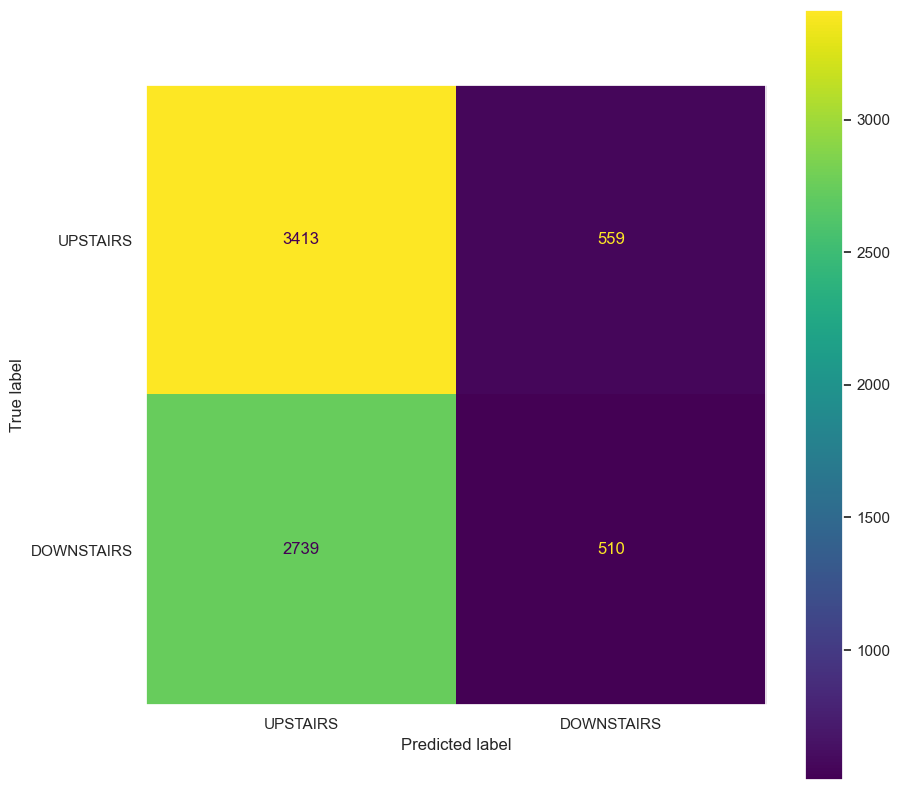

Training Accuracy LogisticRegression 54.37763400011871  Test Accuracy LogisticRegression 53.98144301343304
Training Precesion LogisticRegression 54.37763400011871  Test Precesion LogisticRegression 53.98144301343304
Training Recall LogisticRegression 54.37763400011871  Test Recall LogisticRegression 53.98144301343304


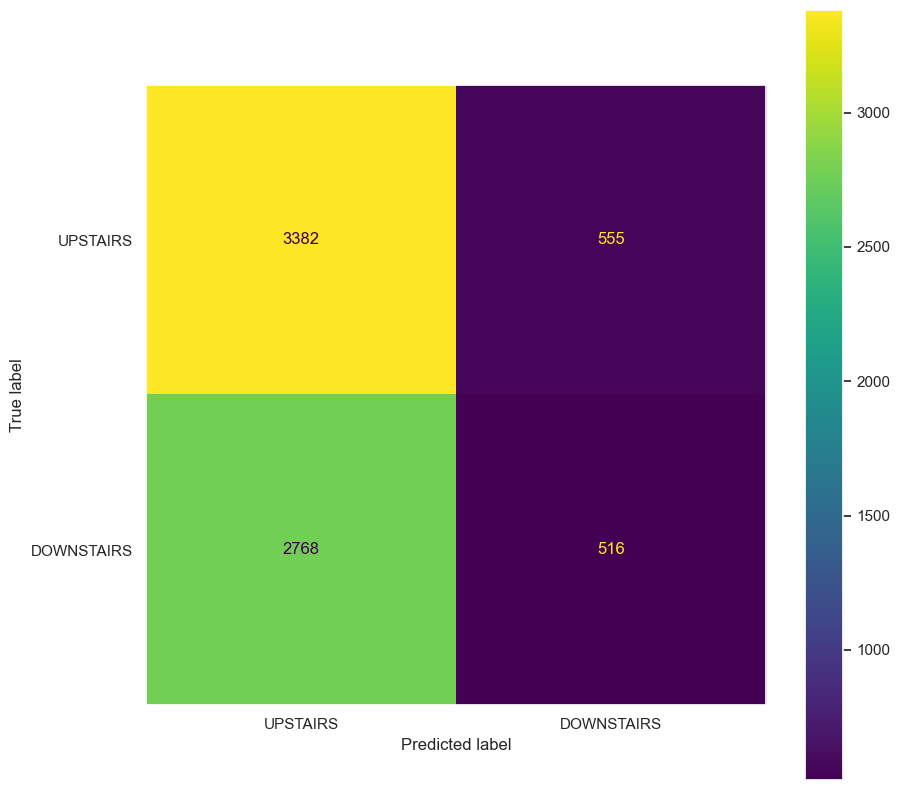

In [241]:
X_test = full_data_test.drop(['Activity'], axis=1)
y_test = full_data_test['Activity']
x_train_test, x_test_test, y_train_test, y_test_test = train_test_split(X_test, y_test, test_size=0.3, shuffle=True)

lrm = LogisticRegression().fit(x_train_test, y_train_test)

evaluate_classification(lrm, "LogisticRegression", x_train_test, x_test_test, y_train_test, y_test_test)

In [242]:
# save result into file model
import pickle

file_name = 'LogisticRegression_model_trained_on_raw_data_only.plk'
with open(file_name, 'wb') as file:
    pickle.dump(lrm, file)


with open(file_name, 'rb') as file:
    pickle_model = pickle.load(file)

scoreUP = pickle_model.score(x_test_UP, y_test_UP)
print("Test Score for UP : {0:.2f} %".format(100*scoreUP))
scoreDOWN = pickle_model.score(x_test_DOWN, y_test_DOWN)
print("Test Score for Down : {0:.2f} %".format(100*scoreDOWN))

Test Score for UP : 16.16 %
Test Score for Down : 54.27 %
Test Score for UP : 15.96 %
Test Score for Down : 54.26 %
